In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler

In [2]:
# NOTE: Make sure that the outcome column is labeled 'ptot' in the data file
tpot_data = pd.read_csv('solar_PV_forecaster/solar_project_data.csv')

# Convert the object column to datetime
tpot_data['tstamp'] = pd.to_datetime(tpot_data['tstamp'])
# Set the timestamp column as the DataFrame index
tpot_data.set_index('tstamp', inplace=True)

tpot_data

,meter_id,impwh,expwh,ptot,Power Loss Event,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,Zenith,AlbedoDaily
tstamp,,,,,,,,,,,,,,,,,
2020-11-29 05:00:00,5884,59.68,1.183848e+09,0.0,2,16.7,-105,0.0,11.9,58,679,190,248,14.8,73.5,74,0.10
2020-11-29 05:05:00,5884,59.68,1.183848e+09,0.0,2,16.7,-105,0.0,11.9,60,696,207,266,14.8,73.2,73,0.10
2020-11-29 05:10:00,5884,59.68,1.183848e+09,0.0,2,16.7,-104,0.0,11.9,61,713,223,285,14.8,73.1,72,0.10
2020-11-29 05:15:00,5884,59.68,1.183848e+09,0.0,2,16.8,-103,0.0,11.9,63,729,240,303,14.8,72.9,71,0.10
2020-11-29 05:20:00,5884,59.68,1.183848e+09,0.0,2,16.8,-103,0.0,11.9,65,744,258,322,14.8,72.8,70,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 19:40:00,7672,101261.92,2.211767e+09,0.0,2,17.7,129,27.3,14.1,13,28,13,26,23.6,79.5,103,0.09
2023-11-27 19:45:00,7672,101261.92,2.211767e+09,0.0,2,17.7,130,27.1,14.1,12,27,12,25,23.6,79.6,104,0.09
2023-11-27 19:50:00,7672,101261.92,2.211767e+09,0.0,2,17.7,130,27.1,14.1,11,25,12,23,23.6,79.8,104,0.09


In [3]:
# Drop the specified columns by index from the DataFrame
column_indices_to_drop = [0, 1, 2, 3]
features = tpot_data.drop(tpot_data.columns[column_indices_to_drop], axis=1)

scaler = StandardScaler()
features[['Power Loss Event', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'Zenith', 'AlbedoDaily']] = scaler.fit_transform(features[['Power Loss Event', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'Zenith', 'AlbedoDaily']])
features

,Power Loss Event,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,Zenith,AlbedoDaily
tstamp,,,,,,,,,,,,,
2020-11-29 05:00:00,2.634336,-0.518691,-1.958477,-0.886303,0.252266,-0.536551,0.755317,-0.184308,-0.392539,-0.444306,0.552744,0.366907,-0.817409
2020-11-29 05:05:00,2.634336,-0.518691,-1.958477,-0.886303,0.252266,-0.521668,0.798896,-0.125259,-0.336087,-0.444306,0.538827,0.331637,-0.817409
2020-11-29 05:10:00,2.634336,-0.518691,-1.943836,-0.886303,0.252266,-0.514226,0.842475,-0.069683,-0.276499,-0.444306,0.534188,0.296367,-0.817409
2020-11-29 05:15:00,2.634336,-0.497824,-1.929196,-0.886303,0.252266,-0.499343,0.883491,-0.010633,-0.220046,-0.444306,0.524910,0.261097,-0.817409
2020-11-29 05:20:00,2.634336,-0.497824,-1.929196,-0.886303,0.252266,-0.484459,0.921943,0.051890,-0.160458,-0.444306,0.520271,0.225827,-0.817409
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 19:40:00,2.634336,-0.310021,1.467404,0.175006,0.605954,-0.871429,-0.913505,-0.799119,-1.088784,0.553534,0.831085,1.389735,-1.060030
2023-11-27 19:45:00,2.634336,-0.310021,1.482044,0.167231,0.605954,-0.878871,-0.916068,-0.802592,-1.091920,0.553534,0.835724,1.425005,-1.060030
2023-11-27 19:50:00,2.634336,-0.310021,1.482044,0.167231,0.605954,-0.886313,-0.921195,-0.802592,-1.098192,0.553534,0.845002,1.425005,-1.060030


In [4]:
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['ptot'], random_state=None)

# Average CV score on the training set was: -2.143490963820017e-26
exported_pipeline = make_pipeline(
    RobustScaler(),
    LassoLarsCV(normalize=False)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_base.py:121: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [5]:
# NOTE: Make sure that the outcome column is labeled 'target' in the data file
predict_df = pd.read_csv('solar_PV_forecaster/solar_test_data.csv')#, sep='COLUMN_SEPARATOR')#, dtype=np.float64)

# Convert the object column to datetime
predict_df['tstamp'] = pd.to_datetime(predict_df['tstamp'])
# Set the timestamp column as the DataFrame index
predict_df.set_index('tstamp', inplace=True)

if predict_df.isna().any().any():
     # NaN values are present, drop them
     predict_df = predict_df.dropna()
    
predict_df

,meter_id,impwh,expwh,ptot,Power Loss Event,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,PrecipitableWater,RelativeHumidity,Zenith,AlbedoDaily
tstamp,,,,,,,,,,,,,,,,,
2023-01-01 05:00:00,10710,126.80,50309500.0,0.000,2,17.8,-108.0,12.9,14.5,95.0,400.0,102.0,197.0,14.8,80.7,75.0,0.12
2023-01-01 05:05:00,10710,126.80,50309500.0,0.000,2,18.0,-108.0,12.0,14.5,98.0,433.0,118.0,215.0,14.8,80.1,74.0,0.12
2023-01-01 05:10:00,10710,126.80,50309500.0,0.000,2,18.2,-107.0,10.2,14.5,96.0,485.0,140.0,236.0,14.9,79.2,73.0,0.12
2023-01-01 05:15:00,10710,126.80,50309500.0,0.000,2,18.4,-106.0,11.1,14.6,104.0,478.0,146.0,250.0,14.9,78.3,72.0,0.12
2023-01-01 05:20:00,10710,126.80,50309500.0,0.000,2,18.6,-106.0,10.2,14.6,106.0,508.0,164.0,269.0,15.0,77.5,71.0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01 19:40:00,10710,9554.64,221608576.0,0.578,0,13.6,137.0,17.9,11.6,0.0,0.0,0.0,0.0,18.6,87.8,110.0,0.12
2023-12-01 19:45:00,10710,9554.64,221608592.0,0.192,0,13.5,138.0,17.9,11.6,0.0,0.0,0.0,0.0,18.5,88.0,111.0,0.12
2023-12-01 19:50:00,10710,9554.64,221608624.0,0.384,0,13.5,139.0,0.0,11.6,0.0,0.0,0.0,0.0,18.3,88.3,112.0,0.12


In [6]:
# Drop the specified columns by index from the DataFrame
column_indices_to_drop = [0, 1, 2, 3]
X = predict_df.drop(predict_df.columns[column_indices_to_drop], axis=1)

X[['Power Loss Event', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'Zenith', 'AlbedoDaily']] = scaler.transform(X[['Power Loss Event', 'AirTemp', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'Zenith', 'AlbedoDaily']])

results = exported_pipeline.predict(X)

In [7]:
results

array([-110.62205778, -104.91878673,  -96.90404509, ...,  106.69496086,
        107.72102483,  101.28362837])

In [8]:
len(results)

53279

In [9]:
df = pd.DataFrame(results, columns=['ptot_pred'])
df

,ptot_pred
0,-110.622058
1,-104.918787
2,-96.904045
3,-93.217265
4,-87.887025
...,...
53274,103.973736
53275,102.817547
53276,106.694961
53277,107.721025


In [10]:
# Insert 'meter_id' column with the value '10710'
df['meter_id'] = 10710

df

,ptot_pred,meter_id
0,-110.622058,10710
1,-104.918787,10710
2,-96.904045,10710
3,-93.217265,10710
4,-87.887025,10710
...,...,...
53274,103.973736,10710
53275,102.817547,10710
53276,106.694961,10710
53277,107.721025,10710


In [11]:
# merged_df = pd.merge(left=predict_df, right=df, on='meter_id', how='left')

# merged_df

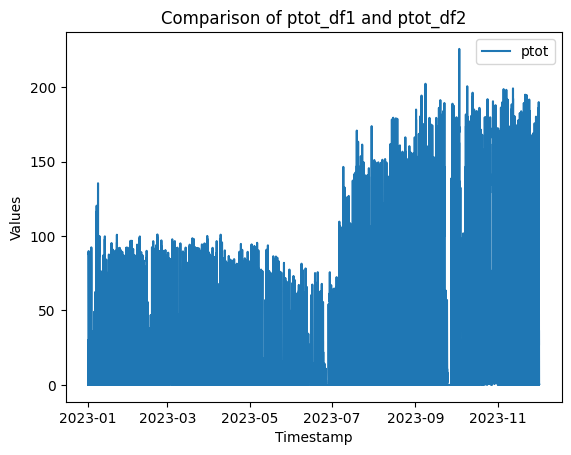

In [18]:
# Plot columns from both DataFrames on the same plot
plt.plot(predict_df['ptot'], label='ptot')
#plt.plot(df['ptot_pred'], label='ptot predicted')

# Add labels, title, and legend
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Comparison of ptot_df1 and ptot_df2')
plt.legend()

# Show the plot
plt.show()

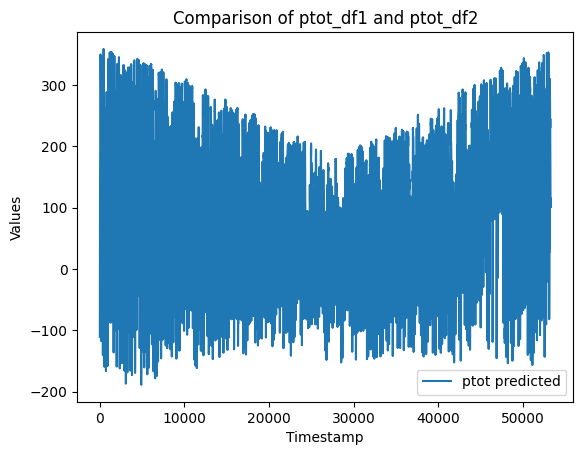

In [16]:
plt.plot(df['ptot_pred'], label='ptot predicted')

# Add labels, title, and legend
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Comparison of ptot_df1 and ptot_df2')
plt.legend()

# Show the plot
plt.show()